In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load the Dataset
file_path = "/content/drive/My Drive/Dataset/tsla.csv"
df = pd.read_csv(file_path)

In [ ]:
# Step 2: Select and Preprocess the Feature (Close Price)
data = df['close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# Step 3: Create Sequences for Training
sequence_length = 30
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.expand_dims(X, axis=2)  # Reshape X for RNN input

In [ ]:
# Step 4: Build the Simple RNN Model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Step 5: Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [ ]:
# Step 6: Train the Model
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0287 - mae: 0.0751 - val_loss: 0.0024 - val_mae: 0.0414
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mae: 0.0231 - val_loss: 0.0011 - val_mae: 0.0257
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0025 - mae: 0.0226 - val_loss: 0.0029 - val_mae: 0.0465
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0020 - mae: 0.0201 - val_loss: 7.2427e-04 - val_mae: 0.0209
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0019 - mae: 0.0186 - val_loss: 8.6774e-04 - val_mae: 0.0231
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018 - mae: 0.0190 - val_loss: 6.9454e-04 - val_mae: 0.0205
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - mae: 0.0178 - val_loss: 8.3883e-04 - val_mae: 0.0225
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - mae: 0.0180 - val_loss: 0.0014 - val_mae: 0.0294
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step -

In [ ]:
# Step 7: Make Predictions
y_pred = model.predict(X)
predicted_prices = scaler.inverse_transform(y_pred)
true_prices = scaler.inverse_transform(y.reshape(-1, 1))

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


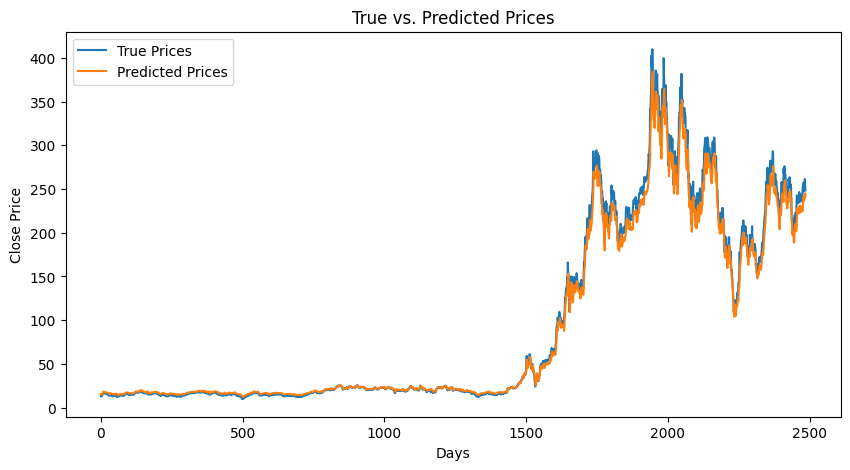

In [ ]:
# Step 8: Plot True vs. Predicted Prices
plt.figure(figsize=(10, 5))
plt.plot(true_prices, label='True Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title('True vs. Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
# Step 9: Calculate and Display Regression Metrics
mse = mean_squared_error(true_prices, predicted_prices)
mae = mean_absolute_error(true_prices, predicted_prices)
r2 = r2_score(true_prices, predicted_prices)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")

Mean Squared Error (MSE): 98.8689
Mean Absolute Error (MAE): 5.8001
R-squared (R2 Score): 0.9916


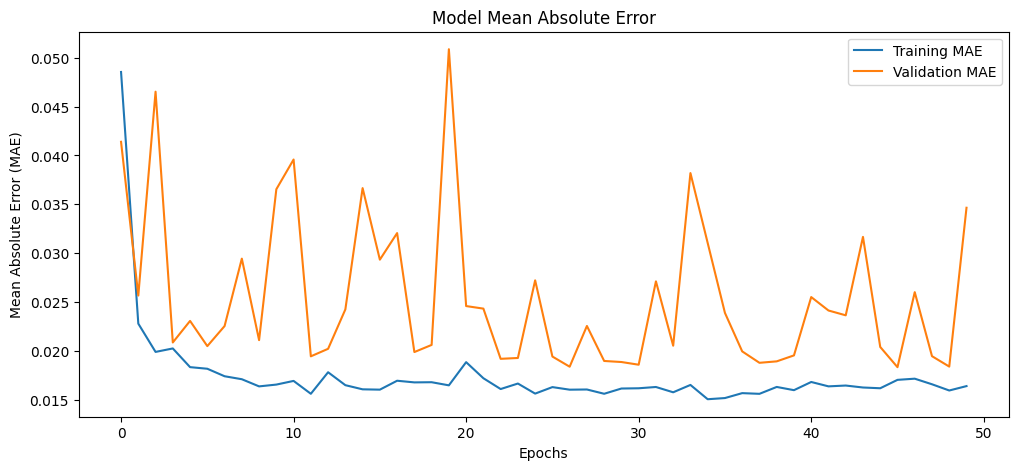

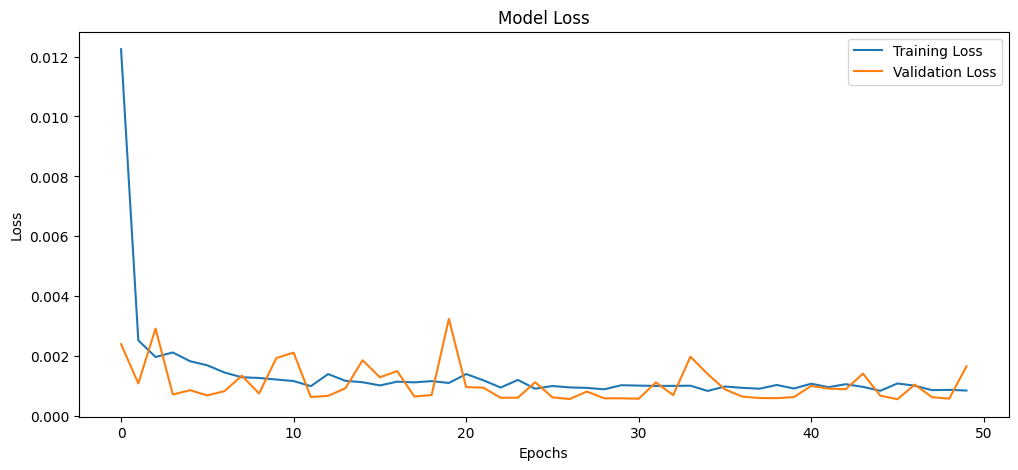

In [ ]:
# Step 10: Plot Learning Curves for MAE and Loss
# Plotting Mean Absolute Error (MAE)
plt.figure(figsize=(12, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.show()

# Plotting Loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

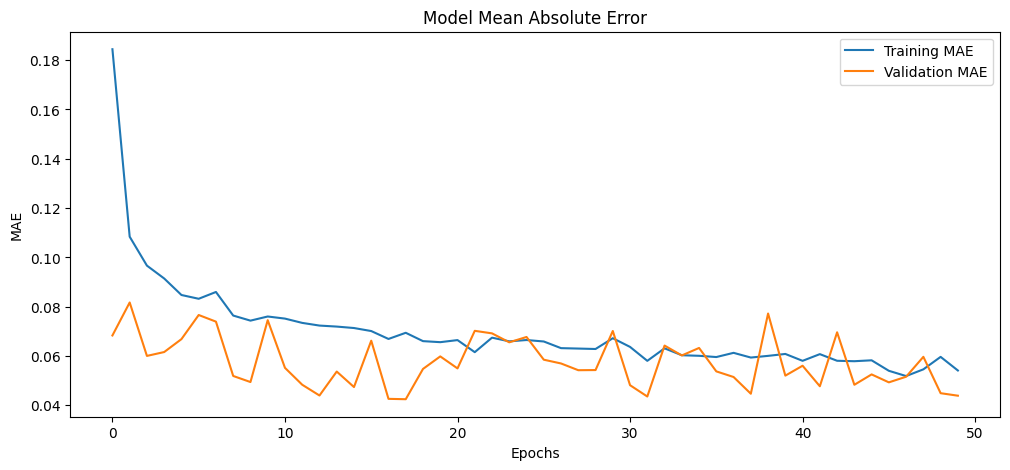

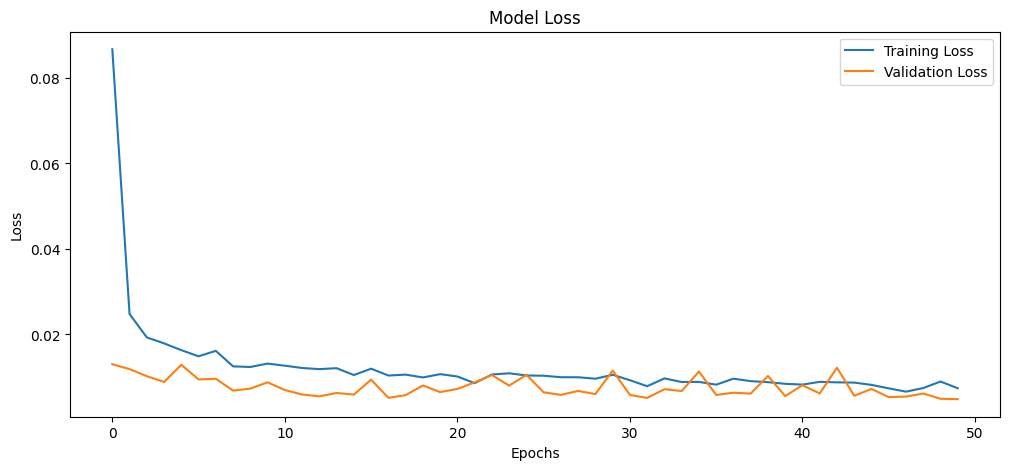

In [ ]:
# Step 13: Plot Learning Curves
plt.figure(figsize=(12, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Step 14: Save the Model
model.save("/content/drive/My Drive/tsla_lstm_model.h5")
print("Model saved successfully!")

Model saved successfully!
